# Priceonomics Data Puzzle

Author: Jai Miles

Date: 07/01/2020



[GitHubLink](https://github.com/jaimiles23/Priceonomics_Data_Puzzle)


[Source](https://priceonomics.com/the-priceonomics-data-puzzle-treefortbnb/)


Purpose: Priceonomics Puzzle

Challenge: Tell us the median price of booking a room in each of the top 100 cities in this data set. 



Stated Considerations:
- More specifically, send us back a table with a list of the median price in each city, ranked from most to least expensive. 
- Restrict your analysis to just to the \"top 100\" cities that have the most units on the market.


Extra Considerations:
- There may be duplicate city names in different states. 
  I will handle this by first grouping cities & states and then counting cities.
  NOTE: Some of these duplicates may be from data entry, e.g., Berkeley, CO is a city neighborhood.

- Don't assume that all data has uniform input.
  After working with the data, I discovered case inconsistencies, 
  e.g., New York, NY vs new york, NY. In analysis, I considered these the same cities.

- Some locations may be listed under different names. 
  After grouping the data, I noticed that Miami and Miami beach are both listed. 
  With some research, I decided to group the two separately.
  https://www.tripadvisor.com/ShowTopic-g34438-i92-k1409657-Whats_the_difference_between_miami_and_miami_beach-Miami_Florida.html

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Libraries

Import libraries

In [2]:
import os


from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Data Import

Import data

In [3]:
# os.getcwd()
filename_weburl = "https://pix-media.priceonomics-media.com/Data+for+TreefortBnB+Puzzle.csv"

df = pd.read_csv(filename_weburl)

In [4]:
df.head()

,Unique id,City,State,$ Price,# of Reviews
0,1,Portland,OR,75,5
1,2,San Diego,CA,95,3
2,3,New York,NY,149,37
3,4,Los Angeles,CA,199,45
4,5,Denver,CO,56,99


# Data Wrangling

## Clean column names

In [5]:
print(df.columns)

col_names = (
    "id",
    "city",
    "state",
    "price_usd",
    "num_reviews",
)

df.columns = col_names
print(df.columns)

Index(['Unique id', 'City', 'State', '$ Price', '# of Reviews'], dtype='object')
Index(['id', 'city', 'state', 'price_usd', 'num_reviews'], dtype='object')


## Check for missing values

False	id
False	city
False	state
False	price_usd
False	num_reviews


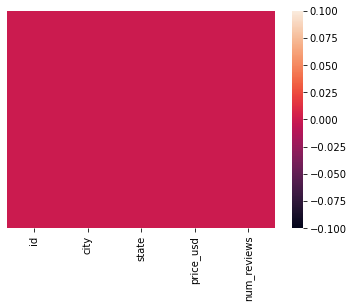

In [6]:
## Visual check
sns.heatmap(
    df.isnull(),
    yticklabels = False,
    cbar = True,
)

## check each column for missing values
for col in df.columns:
    are_null = df[[col]].isnull().values.any()
    print(are_null, col, sep = "\t")

## Check data types

In [7]:
df.dtypes

id              int64
city           object
state          object
price_usd       int64
num_reviews     int64
dtype: object

## Clean string data

In [8]:
##########
# Define cleaning functions
##########

def clean_city_col(df: object) -> object:
    """Cleans column of city names to title case & strips white space."""
    col_name = 'city'
    if col_name not in df.columns:
        print(f"{col_name} not found in column names:\n", df.columns)
        return df
    
    df[col_name] = df.loc[:, col_name].str.title().str.strip()
    return df


def clean_state_col(df: object) -> object:
    """Cleans column of states abbrev: upper case & strips white space."""
    col_name = 'state'
    if col_name not in df.columns:
        print(f"{col_name} not found in column names:\n", df.columns)
        return df
    
    df[col_name] = df.loc[:, col_name].str.upper().str.strip()
    return df


##########
# Pipe functions
##########

df = (
    df
    .pipe(clean_city_col)
    .pipe(clean_state_col)
)

df.head()


,id,city,state,price_usd,num_reviews
0,1,Portland,OR,75,5
1,2,San Diego,CA,95,3
2,3,New York,NY,149,37
3,4,Los Angeles,CA,199,45
4,5,Denver,CO,56,99


# Analysis

## 100 cities w/ most units on market

In [9]:
"""
1. Group by city, then state. Select price column
2. Describe for characteristics of data set
3. Sort values by count, in descending order
4. Take top 100 values, and the median column (Q2, 50%)
5. Convert back to dataframe
6. Rename median column
7. Sort values based on median price USD, then by count
"""
df_top_cities = (
    df 
    .groupby( ['city', 'state'])['price_usd'] 
    .describe() 
    .sort_values( 'count', ascending = False) 
    .head(100)[['count', '50%']] 
    .rename( columns = { '50%' : 'median_price_usd'}) 
    .sort_values(by = ['median_price_usd', 'count'], ascending = False)
)


df_top_cities.head()

,,count,median_price_usd
city,state,,
Indianapolis,IN,251.0,650.0
Malibu,CA,92.0,304.0
Park City,UT,229.0,299.0
Truckee,NV,67.0,275.0
Healdsburg,CA,49.0,275.0


In [10]:
# pd.set_option('display.max_rows', None)

df_top_cities.head()

,,count,median_price_usd
city,state,,
Indianapolis,IN,251.0,650.0
Malibu,CA,92.0,304.0
Park City,UT,229.0,299.0
Truckee,NV,67.0,275.0
Healdsburg,CA,49.0,275.0


groupby created a multi-index. Need to reset the dataframe index.

In [11]:
print(type(df_top_cities))

df_top_cities.reset_index().head()

<class 'pandas.core.frame.DataFrame'>


,city,state,count,median_price_usd
0,Indianapolis,IN,251.0,650.0
1,Malibu,CA,92.0,304.0
2,Park City,UT,229.0,299.0
3,Truckee,NV,67.0,275.0
4,Healdsburg,CA,49.0,275.0


df_top_cities shows the most expensive treefort-bnb cities in the United States, by medium price.

# Exploratory analysis

There is a distinct difference between the two most expensive cities: Indianapolis, IN and Malibu, CA.

Indianapolis is 2x more expensive than Malibu, which is an unexpected result. 
Additionally, the median is a robust statistic and thus there is a possibility that there are multiple anonmalies in the data.

In [12]:
## Check descriptive statistics for price_usd
df['price_usd'].describe()

count    42802.000000
mean       187.117074
std        263.002109
min         10.000000
25%         90.000000
50%        130.000000
75%        200.000000
max      10000.000000
Name: price_usd, dtype: float64

The max price is 10,000 USD and Q3 is 200 USD!

There is something strange here that needs more exploring.

## Identify outliers

Although the median is a robust statistic, it's possible that a large quantity of outliers are still offsetting the data.

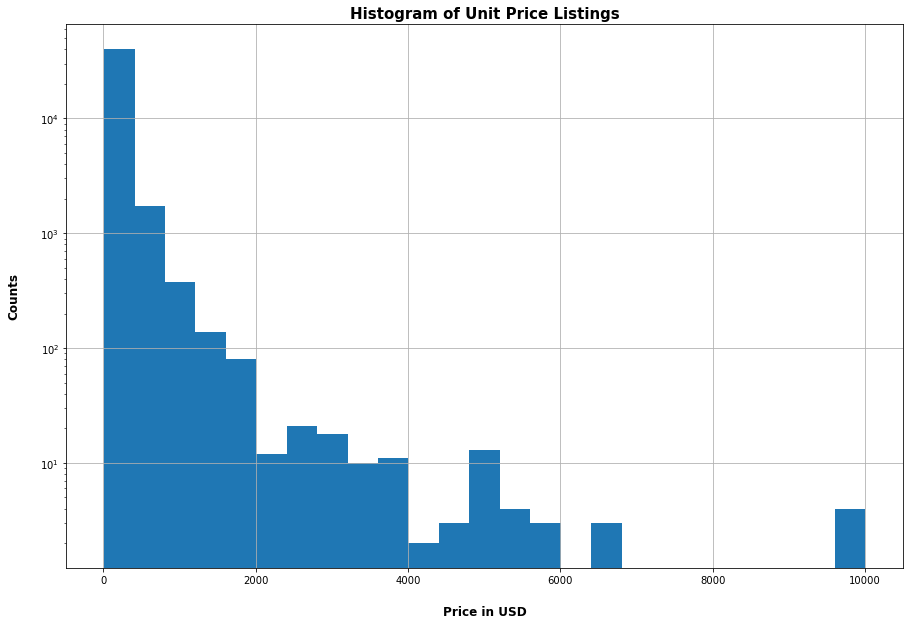

In [13]:
hist_price_usd = df.hist(
    column = 'price_usd',
    bins = 25,
    figsize = (15, 10),
    log = True    # to veiw data
)

axes = hist_price_usd[0]
for x in axes:
    # TItle
    x.set_title("Histogram of Unit Price Listings", weight = 'bold', size = 15)

    # Axis labels
    x.set_xlabel("Price in USD", labelpad=20, weight='bold', size=12)
    x.set_ylabel("Counts", labelpad=20, weight='bold', size=12)
    
    ## Remove ticks
    x.tick_params(bottom = 'off', left = 'off')


Histogram shows that there are units listed above $2,000.

Additionally, there are even some units listed at $10,000.


In [14]:
## Filter rows > 4000
expensive_cities = (
    df[df['price_usd'] > 4000] 
    .sort_values('price_usd', ascending = False)
)

expensive_cities

,id,city,state,price_usd,num_reviews
26232,26233,Park City,UT,10000,0
8867,8868,Park City,UT,10000,1
28626,28627,Miami Beach,FL,10000,0
2819,2820,San Francisco,CA,10000,31
8328,8329,Chicago,IL,6500,1
10332,10333,Park City,UT,6500,0
13431,13432,Queens,NY,6500,0
5135,5136,San Francisco,CA,6000,11
35136,35137,Miami Beach,FL,6000,0
38261,38262,Miami Beach,FL,5750,0


These more expensive treefortbnb's often have 0 reviews. It's worth exploring the relationship between unit price and number of reviews

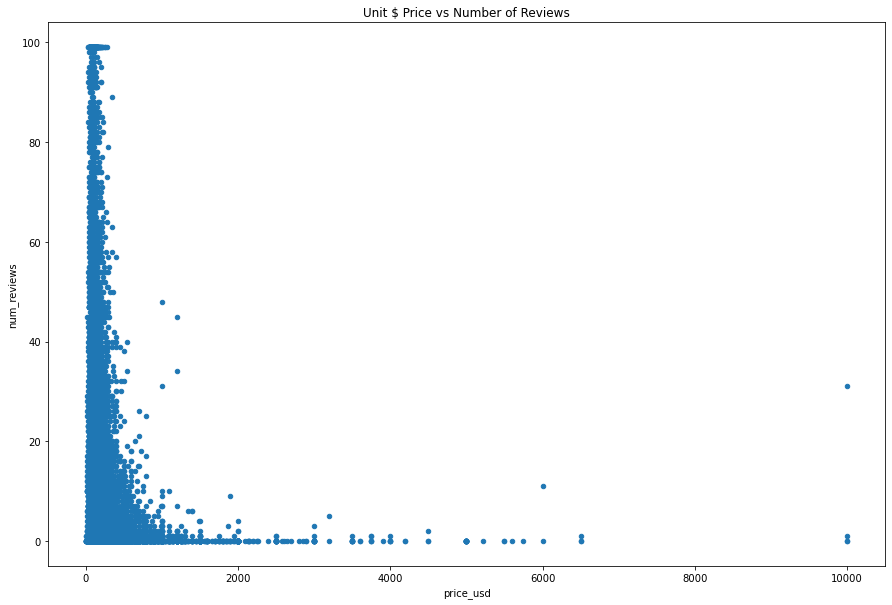

In [15]:
## See few reviews for expensive_cities
## Scatterplot to view relationship between price_usd & num_reviews
df.plot(
    x = 'price_usd',
    y = 'num_reviews',
    kind = 'scatter',
    figsize = (15, 10),
    title = "Unit $ Price vs Number of Reviews"
)

Indianapolis, IN had the highest median USD price for analysis. 
Let's check the relationship of USD $ Price to Number of Reviews for only Indianapolis

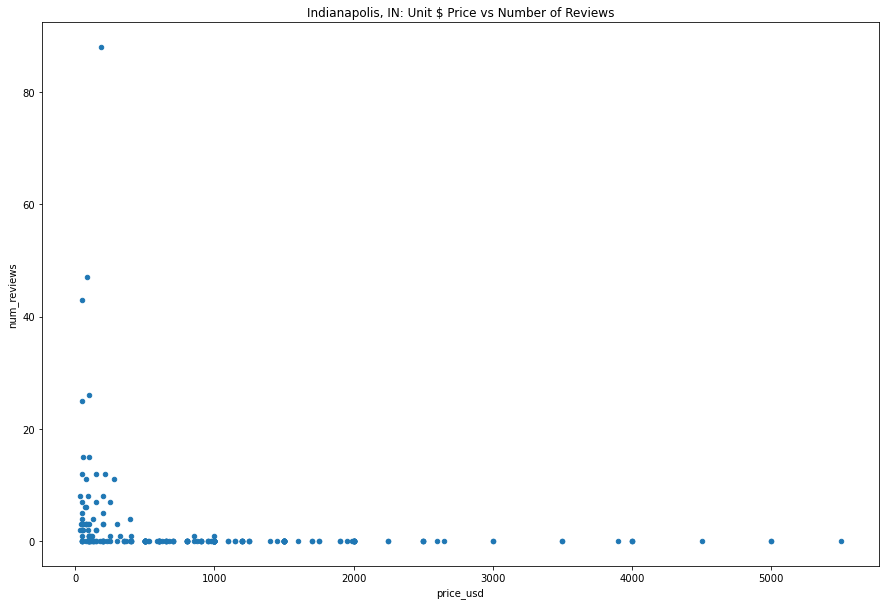

In [16]:
indianapolis_in_only = df[df.city == "Indianapolis"]
indianapolis_in_only.plot(
    x = 'price_usd',
    y = 'num_reviews',
    kind = 'scatter',
    figsize = (15, 10),
    title = "Indianapolis, IN: Unit $ Price vs Number of Reviews"
)

Scatterplot above indicates that there are a lot of datapoints above $1,000 without any reviews.

Based on this, let's remove the data without reviews.

## Remove data w/o reviews

In [17]:
reviewed_units = df[df['num_reviews'] > 0]
not_reviewed_units = df[df['num_reviews'] == 0]

reviewed_units.describe()

,id,price_usd,num_reviews
count,26802.000000,26802.000000,26802.000000
mean,17271.547795,156.726252,11.268450
std,11084.220602,168.202838,16.385404
min,1.000000,10.000000,1.000000
25%,7540.250000,85.000000,2.000000
50%,16235.500000,125.000000,5.000000
75%,26220.750000,185.000000,13.000000
max,42314.000000,10000.000000,99.000000


In [18]:
not_reviewed_units.describe()

,id,price_usd,num_reviews
count,16000.000000,16000.000000,16000.0
mean,28319.686187,238.025500,0.0
std,11233.059831,365.393895,0.0
min,7.000000,10.000000,0.0
25%,20279.500000,100.000000,0.0
50%,30777.500000,150.000000,0.0
75%,38170.250000,250.000000,0.0
max,42802.000000,10000.000000,0.0


The two tables above show descriptive statistics for reviewed units compared to non-reviewed units.

The mean price_usd for non-reviewed units is $82 more expensive than for units with reviews. Additionally, the standard deviation is more than twice as large for non-reviewed units!
The non-reviewed units are inflating the price statistics.

The priceonomic puzzle asked specifically for the **median**. Due to its robustness, the median only differs by $25 between the two groups.

However, the purpose of the median is to provide a central measure of the data. 16,000 units do not have reviews. If we consider reviews as a proxy for attendance, we can assume that the units without reviews are not a traditional experience at TreefornBnb. Below is a table of the median price for top cities, only using records with reviews.

In [19]:
top_100_rev_units = (
    reviewed_units
    .groupby( ['city', 'state'])['price_usd']
    .describe()
    .sort_values( 'count', ascending = False)
    .head(100)['50%']
    .to_frame()
    .rename( columns = { '50%' : 'median_price_usd'})
    .sort_values( 'median_price_usd', ascending = False)
)


top_100_rev_units.head()

,,median_price_usd
city,state,
Carmel,CA,300.0
Malibu,CA,225.0
Truckee,NV,200.0
Laguna Beach,CA,200.0
Incline Village,NV,200.0
